In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

### Array operations with NumPy

Let's assume the next equation:

$$
u'_i = u_i - u_{i-1} 
$$

If $u = [0,1,2,3,4,5]$, there are two different ways of computing the value of the array $u'$:

In [2]:
u = np.array([0,1,2,3,4,5])
up1 = np.zeros(len(u)-1)

for i in range(1, len(u)):
    up1[i-1] = u[i] - u[i-1]
    
print(up1)

[ 1.  1.  1.  1.  1.]


In [3]:
up2 = u[1:] - u[0:-1]

print(up2)

[1 1 1 1 1]


The differences in time for this case will be small. Let's apply it to a bigger array case.

In [4]:
nx = 81
ny = 81
nt = 100
c = 1
dx = 2 / (nx-1)
dy = 2 / (ny-1)
CFL = 0.2
dt = CFL * dx / c

x = np.linspace(0,2,nx)
y = np.linspace(0,2,ny)

u = np.ones((ny,nx))
un = np.ones((ny,nx))

In [5]:
%%timeit

#Initial conditions
u = np.ones((ny,nx))
u[int(.5/dy):int(1/dy+1),int(0.5/dx):int(1/dx+1)] = 2

for n in range(nt+1):
    un = u.copy()
    row, col  = u.shape
    for j in range(1,row):
        for i in range(1,col):
            u[j,i] = (un[j,i] - (c * dt/dx * (un[j,i] - un[j,i - 1])) - (c * dt/dy * (un[j,i] - un[j - 1, i])))
            u[0,:] = 1
            u[-1,:] = 1
            u[:,0] = 1
            u[:, -1] = 1

2.57 s ± 112 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
%%timeit

#Initial conditions
u = np.ones((ny,nx))
u[int(.5/dy):int(1/dy+1),int(0.5/dx):int(1/dx+1)] = 2

for n in range(nt+1):
    un = u.copy()
    u[1:,1:] = (un[1:,1:] - (c * dt/dx * (un[1:,1:] - un[1:,0:-1])) - (c * dt/dy * (un[1:,1:] - un[0:-1,1:])))
    u[0,:] = 1
    u[-1,:] = 1
    u[:,0] = 1
    u[:, -1] = 1

6.13 ms ± 727 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Linear Convection in 2D

Moving onto a two dimensional space will require a simple definition:

$$
\text{"A partial derivative wirh respect to x is the variation in the x direction at constant y"}
$$

A uniform 2D grid is defined by:

$$
x_i = x_0 + i \Delta x \qquad \qquad \qquad y_i = y_0 + i \Delta y
$$

The variable $u$ will now be defined such as $u_{i,j} = u(x_i,y_i)$. The equation that governs 2D linear convection is:

$$
\dfrac{\partial u}{\partial t} + c \dfrac{\partial u}{\partial x} + c \dfrac{\partial u}{\partial y} = 0
$$

The equation can be discretized as follows:

$$
\dfrac{u^{n+1}_{i,j}-u^n_{i,j}}{\Delta t} + c \dfrac{u_{i,j}^{n}-u_{i-1,j}^n}{\Delta x}+c\dfrac{u_{i,j}^{n}-u_{i,j-1}^{n}}{\Delta y} = 0
$$

Solving for the only variable that there is in the equation $\left(u_{i,j}^{n+1}\right)$, it yields:

$$
u_{i,j}^{n+1} = u_{i,j}^{n} - c \dfrac{\Delta t}{\Delta x} \left( u_{i,j}^{n}-u_{i-1,j}^n \right) - c \dfrac{\Delta t}{\Delta y} \left( u_{i,j}^{n}-u_{i,j-1}^n \right)
$$

We will solve this equation with the next set of initial conditions:

$$
u(x,y) = \begin{Bmatrix} 2 & \text{ for} & 0.5 \leqslant x, y \leqslant 1 \\ 1 & \text{ for} & \text{everywhere else} \\ \end{Bmatrix}
$$

and the next set of boundary conditions:

$$
u=1 \text{  for  } \begin{Bmatrix} x=0,\ 2 \\ y=0,\ 2 \end{Bmatrix}
$$

In [7]:
nx = 81
ny = 81
nt = 100
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
CFL = 0.2
dt = CFL * dx / c

x = np.linspace(0,2,nx)
y = np.linspace(0,2,ny)

u = np.ones((ny, nx))

u[int(0.5/dy):int(1/dy+1),int(0.5/dx):int(1/dx+1)]=2

X, Y = np.meshgrid(x,y)

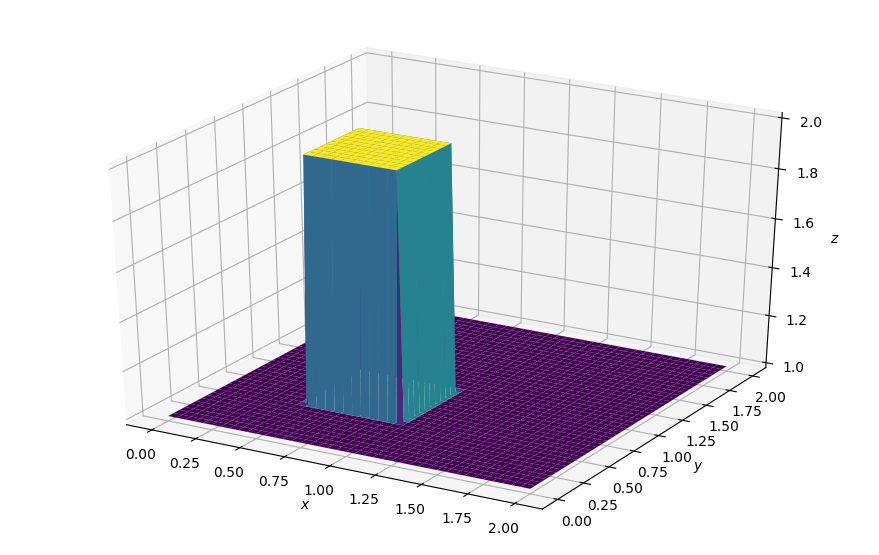

In [8]:
#simple code to 3D plotting
fig = plt.figure(figsize=(11,7), dpi=100)
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, u[:], cmap=cm.viridis)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.grid(True)

In [9]:
#Initial conditions
u = np.ones((ny,nx))
u[int(.5/dy):int(1/dy+1),int(0.5/dx):int(1/dx+1)] = 2

for n in range(nt+1):
    un = u.copy()
    u[1:,1:] = (un[1:,1:] - (c * dt/dx * (un[1:,1:] - un[1:,:-1])) - (c * dt/dy * (un[1:,1:] - un[:-1,1:])))
    u[0,:] = 1
    u[-1,:] = 1
    u[:,0] = 1
    u[:, -1] = 1

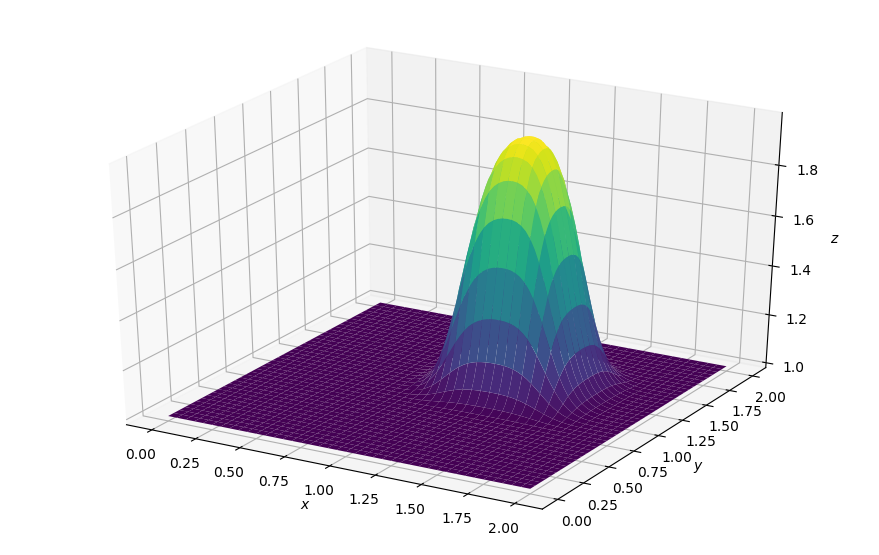

In [10]:
#simple code to 3D plotting
fig = plt.figure(figsize=(11,7), dpi=100)
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, u[:], cmap=cm.viridis)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.grid(True)